Submitted by: **Rukshar Alam**

In [1]:
from google.colab import drive #mounting google drive where I keep my files
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [40]:
import pandas as pd #to import and process csv files
import numpy as np 
import missingno as msno
import matplotlib.pyplot as plt
from collections import Counter


In [ ]:
data_directory = '/content/gdrive/My Drive/Omdena/prothom_alo_1jan2021-28june2021_v1.csv'
prothom_alo_df = pd.read_csv(data_directory) #loading the data into pandas dataframe

In [ ]:
prothom_alo_df.head(5)

,newspaper_name,date_of_incident,time_of_incident,incident_type,location,death_count,injury_count,type_of_vehicle1,type_of_vehicle2,driver_age,description_text,published-time,link,full_text
0,Prothom Alo,6/27/2021,12/30/1899 12:25:00,NaN,"Benapole highway, Jessore",4.0,1.0,private car,truck,NaN,Four people killed in Jashore road accident,"27 Jun 2021, 09:07",https://en.prothomalo.com/bangladesh/accident/...,Four people were killed and another injured on...
1,Prothom Alo,6/23/2021,8.00 PM,NaN,Mymensingh-Tangail highway,3.0,0.0,motocycle,truck,25.0,Three killed in Mymensingh road accident,"23 Jun 2021, 01:29",https://en.prothomalo.com/bangladesh/accident/...,"Three people, including a motorcycle rider, we..."
2,Prothom Alo,6/19/2021,NaN,NaN,old Dhaka-Narayanganj highway,2.0,NaN,battery-run auto-rickshaw,covered van,NaN,2 killed in Fatullah road accident,"19 Jun 2021, 09:29",https://en.prothomalo.com/bangladesh/accident/...,Two passengers of a battery-run auto-rickshaw ...
3,Prothom Alo,6/18/2021,NaN,NaN,Chattogram and Rangamati,7.0,22.0,NaN,NaN,NaN,7 killed in three road accidents in Chattogram...,"18 Jun 2021, 09:58",https://en.prothomalo.com/bangladesh/accident/...,"At least seven people, including women and chi..."
4,NaN,6/18/2021,NaN,head-on,Chattogram,3.0,NaN,Bus,Auto Rickshaw,NaN,NaN,NaN,NaN,NaN


In [ ]:
prothom_alo_df.dtypes #checking out the columns and their types

newspaper_name       object
date_of_incident     object
time_of_incident     object
incident_type        object
location             object
death_count         float64
injury_count        float64
type_of_vehicle1     object
type_of_vehicle2     object
driver_age          float64
description_text     object
published-time       object
link                 object
full_text            object
dtype: object

In [ ]:
#remove 'link' column because I find no use of it for now. Also, all news articles are from the same website (prothom alo), so we delete newspaper_name too
prothom_alo_df_2 = prothom_alo_df.drop(['link', 'newspaper_name'], axis = 1)
prothom_alo_df_2.dtypes

date_of_incident     object
time_of_incident     object
incident_type        object
location             object
death_count         float64
injury_count        float64
type_of_vehicle1     object
type_of_vehicle2     object
driver_age          float64
description_text     object
published-time       object
full_text            object
dtype: object

**Tasks**


1.   Missing Data Analysis
2.   Plot death count
3.   Plot type of vehicle
4.   Plot injury count
5.   plot location
6.   Publish time analysis



## **Missing Data Analysis**
Here we analyze the amount of data missing in each column

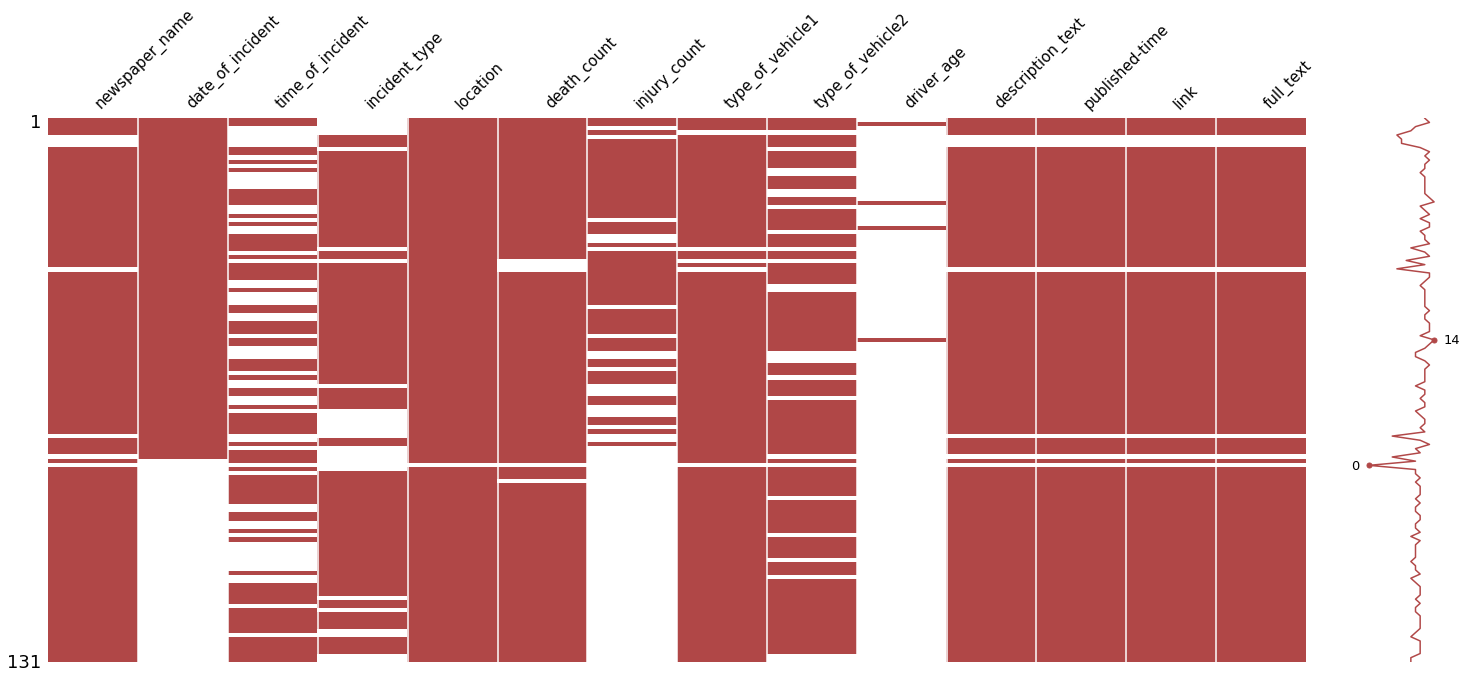

In [ ]:
msno.matrix(prothom_alo_df, fontsize=15 , color=(0.694, 0.282, 0.282))


We can clearly see there are too few data in the '*driver_age*' column. So, we remove it from further analysis

In [ ]:
prothom_alo_df_3 = prothom_alo_df_2.drop(['driver_age'], axis=1)
prothom_alo_df_3.dtypes

date_of_incident     object
time_of_incident     object
incident_type        object
location             object
death_count         float64
injury_count        float64
type_of_vehicle1     object
type_of_vehicle2     object
description_text     object
published-time       object
full_text            object
dtype: object

Let's delete rows where *publishing date* is missing because we're going to make publishing date the index. However, there is one row where the value of 'published-time' is '15 hours ago'. Since we can't format this string to pandas datetime, we delete the row containing this stray value. 

In [ ]:
prothom_alo_df_4 = prothom_alo_df_3.dropna(subset=['published-time'])
prothom_alo_df_4 = prothom_alo_df_4[prothom_alo_df_4['published-time']!='15 hours ago']



**Change format of Published-time**
We are changing the format of published-time to standard form [yyyy-mm-dd hh:mm:ss] and make the column new index for dataframe

In [ ]:
prothom_alo_df_4['published-time'] = pd.to_datetime(prothom_alo_df_4['published-time'])
prothom_alo_df_4.head(10)

,date_of_incident,time_of_incident,incident_type,location,death_count,injury_count,type_of_vehicle1,type_of_vehicle2,description_text,published-time,full_text
0,6/27/2021,12/30/1899 12:25:00,NaN,"Benapole highway, Jessore",4.0,1.0,private car,truck,Four people killed in Jashore road accident,2021-06-27 09:07:00,Four people were killed and another injured on...
1,6/23/2021,8.00 PM,NaN,Mymensingh-Tangail highway,3.0,0.0,motocycle,truck,Three killed in Mymensingh road accident,2021-06-23 01:29:00,"Three people, including a motorcycle rider, we..."
2,6/19/2021,NaN,NaN,old Dhaka-Narayanganj highway,2.0,NaN,battery-run auto-rickshaw,covered van,2 killed in Fatullah road accident,2021-06-19 09:29:00,Two passengers of a battery-run auto-rickshaw ...
3,6/18/2021,NaN,NaN,Chattogram and Rangamati,7.0,22.0,NaN,NaN,7 killed in three road accidents in Chattogram...,2021-06-18 09:58:00,"At least seven people, including women and chi..."
7,6/11/2021,12/30/1899 16:00:00,NaN,Chattogram,1.0,0.0,microbus,NaN,ASI killed in Chattogram road accident,2021-06-11 01:41:00,"An assistant sub-inspector (ASI) of police, Ka..."
8,5/16/2021,12/30/1899 13:30:00,head-on,Dhaka-Sylhet highway,2.0,7.0,private car,bus,Mother-son killed in Sylhet road accident,2021-05-16 07:29:00,A woman and her two-year-old son died in a hea...
9,5/12/2021,NaN,rear-end,Dhaka-Mymensingh highway,2.0,6.0,microbus,Van,"RAB member, another killed in Gazipur road acc...",2021-05-12 09:50:00,"Two people, including a member of Rapid Action..."
10,5/10/2021,12/30/1899 12:00:00,head-on,"Banshkhali upazila, Chittagong",3.0,2.0,auto-rickshaw,truck,3 killed in Chattogram road accident,2021-05-10 07:05:00,"At least three people, including two women, we..."
11,5/3/2021,NaN,head-on,Noakhali,2.0,2.0,Pickup,Van,Road accident kills two workers in Noakhali,2021-05-04 06:09:00,Two workers were killed as a pickup hit a rick...
12,5/4/2021,12/30/1899 8:00:00,Lost control,Meherpur,2.0,5.0,Microbus,NaN,Couple killed in Meherpur road accident,2021-05-04 04:57:00,An elderly man and his wife were killed and fi...


Let's save this modified dataframe as csv for future EDA usage.

In [ ]:
saving_directory = '/content/gdrive/My Drive/Omdena/prothom_alo_modified.csv'
prothom_alo_df_4.to_csv(saving_directory, index=False)

In [3]:
prothom_alo_df = pd.read_csv('/content/gdrive/My Drive/Omdena/prothom_alo_modified.csv') #load modified prothom alo dataframe
prothom_alo_df.head(5)

,date_of_incident,time_of_incident,incident_type,location,death_count,injury_count,type_of_vehicle1,type_of_vehicle2,description_text,published-time,full_text
0,6/27/2021,12/30/1899 12:25:00,NaN,"Benapole highway, Jessore",4.0,1.0,private car,truck,Four people killed in Jashore road accident,2021-06-27 09:07:00,Four people were killed and another injured on...
1,6/23/2021,8.00 PM,NaN,Mymensingh-Tangail highway,3.0,0.0,motocycle,truck,Three killed in Mymensingh road accident,2021-06-23 01:29:00,"Three people, including a motorcycle rider, we..."
2,6/19/2021,NaN,NaN,old Dhaka-Narayanganj highway,2.0,NaN,battery-run auto-rickshaw,covered van,2 killed in Fatullah road accident,2021-06-19 09:29:00,Two passengers of a battery-run auto-rickshaw ...
3,6/18/2021,NaN,NaN,Chattogram and Rangamati,7.0,22.0,NaN,NaN,7 killed in three road accidents in Chattogram...,2021-06-18 09:58:00,"At least seven people, including women and chi..."
4,6/11/2021,12/30/1899 16:00:00,NaN,Chattogram,1.0,0.0,microbus,NaN,ASI killed in Chattogram road accident,2021-06-11 01:41:00,"An assistant sub-inspector (ASI) of police, Ka..."


# **Death Count**

In [ ]:
death_toll_df = prothom_alo_df['death_count'] #extract the column with death count

In [ ]:
death_toll_stats = death_toll_df.value_counts() #counting the frequency of number of people died
death_toll_stats_df = death_toll_stats.to_frame() #creating a frequency of death dataframe with both raw numbers and percentages
death_toll_stats_df.columns = ['raw death toll']
#creating a column for percentage death
total_death = death_toll_stats.sum()
print('total death ', total_death)
death_toll_stats_df['percentage death'] = death_toll_stats_df[['raw death toll']].apply(lambda x: (x/total_death)*100)

total death  121


In [ ]:
death_toll_stats_df

,raw death toll,percentage death
2.0,42,34.710744
1.0,30,24.793388
3.0,25,20.661157
4.0,10,8.264463
6.0,3,2.479339
7.0,3,2.479339
5.0,2,1.652893
0.0,2,1.652893
22.0,1,0.826446
11.0,1,0.826446


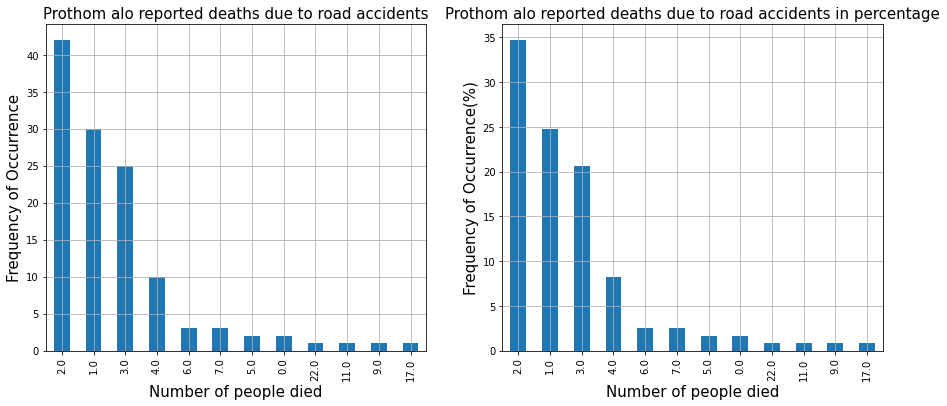

In [ ]:

fig, ax = plt.subplots(1,2,figsize=(15,6))
#ax.bar(death_toll_stats.index, death_toll_stats.values())
death_toll_stats_df['raw death toll'].plot.bar(ax=ax[0])
ax[0].set_xlabel('Number of people died', fontsize=15)
ax[0].set_ylabel('Frequency of Occurrence', fontsize=15)
ax[0].set_title('Prothom alo reported deaths due to road accidents', fontsize = 15)
ax[0].grid()

death_toll_stats_df['percentage death'].plot.bar(ax=ax[1])
ax[1].set_xlabel('Number of people died', fontsize=15)
ax[1].set_ylabel('Frequency of Occurrence(%)', fontsize=15)
ax[1].set_title('Prothom alo reported deaths due to road accidents in percentage', fontsize = 15)
ax[1].grid()
plt.show()

Analyzing the above graphs and associated dataframe, we see in most reported cases 2 persons died(about 35%), followed by 1 person(about 25%) and 3 persons(around 20%). There are fewer cases( less than 10%) reported with 4 fatalities. There are far fewer cases with fatalities crossing 4. 

In [ ]:
death_and_time_df = prothom_alo_df[['death_count', 'published-time']] #take 2 columns : death toll and the corresponding publishing time of the accident time
death_and_time_df['published-time'] = pd.to_datetime(death_and_time_df['published-time'], dayfirst=False) #convert the date column into datetime format

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
death_and_time_df.dtypes

death_count              float64
published-time    datetime64[ns]
dtype: object

In [ ]:
death_and_time_df.head(5)

,death_count,published-time
0,4.0,2021-06-27 09:07:00
1,3.0,2021-06-23 01:29:00
2,2.0,2021-06-19 09:29:00
3,7.0,2021-06-18 09:58:00
4,1.0,2021-06-11 01:41:00


In [ ]:
death_and_time_df.set_index('published-time', inplace=True) #set datetime as index
death_and_time_df.head(3)

,death_count
published-time,
2021-06-27 09:07:00,4.0
2021-06-23 01:29:00,3.0
2021-06-19 09:29:00,2.0


In [ ]:
#sort the dataframe on published-time index
death_and_time_df.sort_index(inplace=True)
death_and_time_df.head(5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,death_count
published-time,
2021-01-01 05:06:00,4.0
2021-01-03 02:04:00,7.0
2021-01-10 00:57:00,2.0
2021-01-11 21:03:00,3.0
2021-01-13 06:42:00,6.0


In [ ]:
rolling_mean = death_and_time_df['death_count'].rolling(window=5, min_periods=1).mean() #calculate rolling mean of daeth count to create smoother plot 
rolling_mean_df = rolling_mean.to_frame()
rolling_mean_df.columns = ['Rolling Mean Death Count']
#concatenate the rolling mean dataframe to the previous dataframe
death_and_time_df_2 = pd.concat([death_and_time_df, rolling_mean_df], axis = 1)

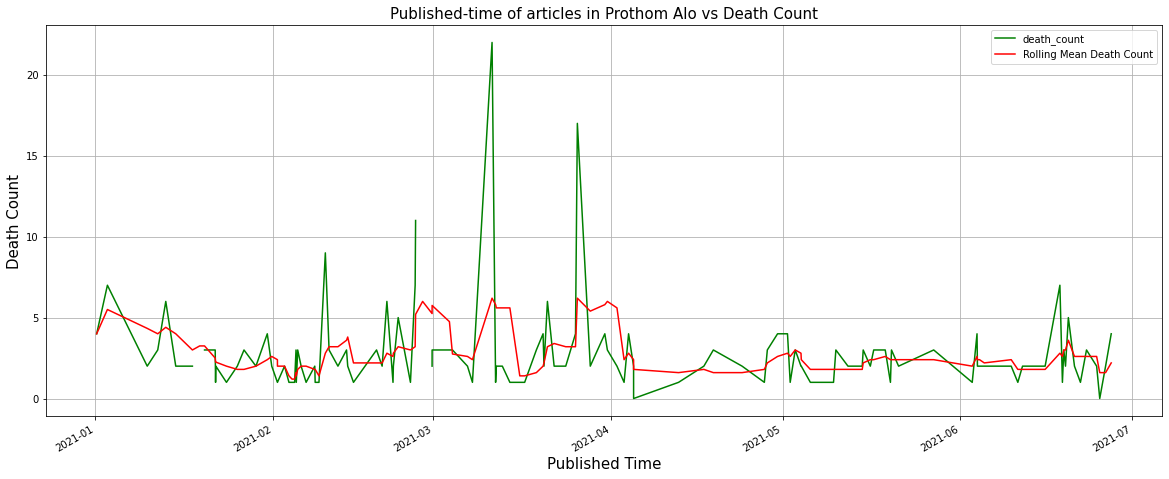

In [ ]:
#plot published-time vs. death count diagram
fig, ax = plt.subplots(figsize=(20,8))
death_and_time_df_2.plot(ax=ax, color=['green', 'red'])
ax.set_xlabel('Published Time', fontsize = 15)
ax.set_ylabel('Death Count', fontsize = 15)
ax.set_title('Published-time of articles in Prothom Alo vs Death Count', fontsize=15)
ax.grid()
plt.show()

# **Injury Count**

In [ ]:
injury_toll_df = prothom_alo_df['injury_count'] #extract the column with injury count

In [ ]:
injury_toll_stats = injury_toll_df.value_counts() #counting the frequency of number of people injured
injury_toll_stats_df = injury_toll_stats.to_frame() #creating a frequency of death dataframe with both raw numbers and percentages
injury_toll_stats_df.columns = ['raw injury toll']
#creating a column for percentage death
total_injury = injury_toll_stats.sum()
print('total injury ', total_injury)
injury_toll_stats_df['percentage injury'] = injury_toll_stats_df[['raw injury toll']].apply(lambda x: (x/total_injury)*100)

total injury  55


In [ ]:
injury_toll_stats_df

,raw injury toll,percentage injury
1.0,12,21.818182
0.0,9,16.363636
3.0,7,12.727273
2.0,7,12.727273
5.0,5,9.090909
6.0,3,5.454545
7.0,3,5.454545
10.0,2,3.636364
4.0,2,3.636364
14.0,1,1.818182


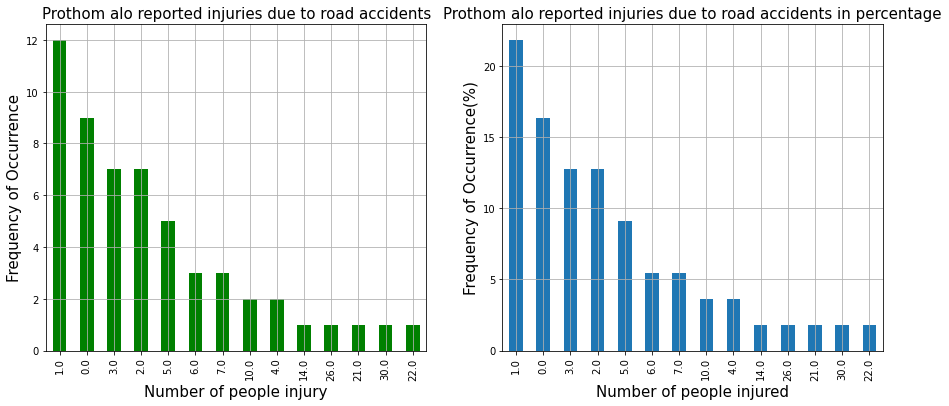

In [ ]:

fig, ax = plt.subplots(1,2,figsize=(15,6))

injury_toll_stats_df['raw injury toll'].plot.bar(ax=ax[0], color='green')
ax[0].set_xlabel('Number of people injury', fontsize=15)
ax[0].set_ylabel('Frequency of Occurrence', fontsize=15)
ax[0].set_title('Prothom alo reported injuries due to road accidents', fontsize = 15)
ax[0].grid()

injury_toll_stats_df['percentage injury'].plot.bar(ax=ax[1])
ax[1].set_xlabel('Number of people injured', fontsize=15)
ax[1].set_ylabel('Frequency of Occurrence(%)', fontsize=15)
ax[1].set_title('Prothom alo reported injuries due to road accidents in percentage', fontsize = 15)
ax[1].grid()
plt.show()

As can be observed from the above plots that, in above 20% cases only one person was injured, in >15% cases no injuries were reported. 2 or 3 person injuries were above 10% each. Injuries above 3 persons are far less reported. 

In [ ]:
injury_and_time_df = prothom_alo_df[['injury_count', 'published-time']] #take 2 columns : injury toll and the corresponding publishing time of the accident time
injury_and_time_df['published-time'] = pd.to_datetime(injury_and_time_df['published-time'], dayfirst=False) #convert the date column into datetime format
injury_and_time_df.set_index('published-time', inplace=True) #set datetime as index
#sort the dataframe on published-time index
injury_and_time_df.sort_index(inplace=True)

injury_and_time_df.head(5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,injury_count
published-time,
2021-01-01 05:06:00,1.0
2021-01-03 02:04:00,NaN
2021-01-10 00:57:00,NaN
2021-01-11 21:03:00,NaN
2021-01-13 06:42:00,NaN


In [ ]:
rolling_mean_injury = injury_and_time_df['injury_count'].rolling(window=5, min_periods=1).mean() #calculate rolling mean of daeth count to create smoother plot 
injury_rolling_mean_df = rolling_mean_injury.to_frame()
injury_rolling_mean_df.columns = ['Rolling Mean Injury Count']
#concatenate the rolling mean dataframe to the previous dataframe
injury_and_time_df_2 = pd.concat([injury_and_time_df, injury_rolling_mean_df], axis = 1)

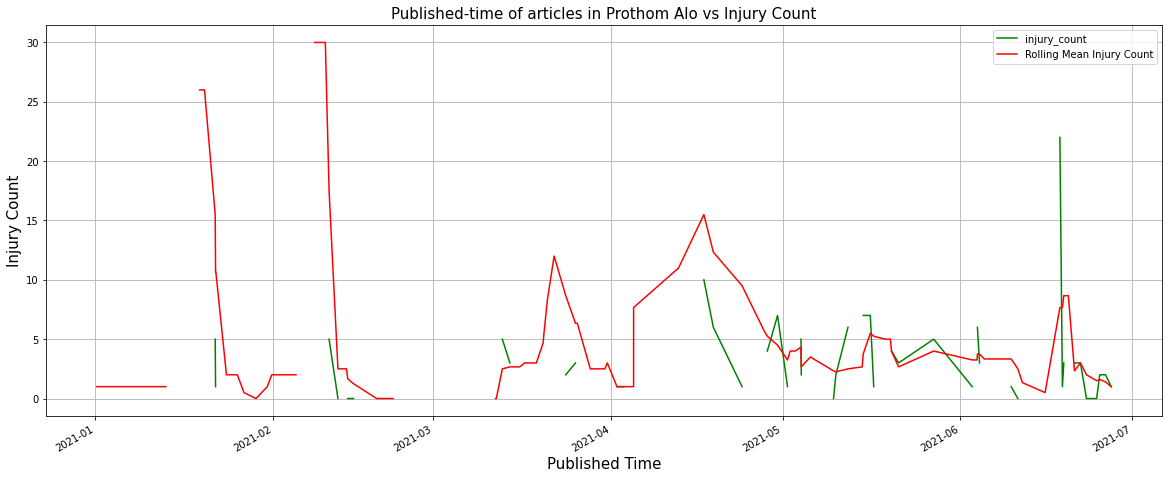

In [ ]:
#plot published-time vs. death count diagram
fig, ax = plt.subplots(figsize=(20,8))
injury_and_time_df_2.plot(ax=ax, color=['green', 'red'])
ax.set_xlabel('Published Time', fontsize = 15)
ax.set_ylabel('Injury Count', fontsize = 15)
ax.set_title('Published-time of articles in Prothom Alo vs Injury Count', fontsize=15)
ax.grid()
plt.show()

In [ ]:
#counting nan values in injury count column to check how much data is missing
percentage_missing_injury_data =( (len(injury_and_time_df_2) - injury_and_time_df_2['injury_count'].count())/len(injury_and_time_df_2))*100
print(percentage_missing_injury_data, '%')

55.28455284552846 %


A lot of the injury related data is missing(55%) and so we can't construct a clear picture of the injury trend from 2021-01 to 2021-07. 

# **Type of Vehicles**

In [14]:
vehicle_columns = prothom_alo_df[['type_of_vehicle1', 'type_of_vehicle2']] #extracting columns of vehicle names
#creating a single column with vehicles' names
vehicle_columns_all = pd.concat([vehicle_columns['type_of_vehicle1'], vehicle_columns['type_of_vehicle2']], axis = 0, ignore_index=True)
vehicle_columns_all = vehicle_columns_all.to_frame()
vehicle_columns_all.columns = ['Vehicle Name']
vehicle_columns_all.dropna(inplace=True) #drop nan values
#make all name lowercase
vehicle_columns_all['Vehicle Name'] =vehicle_columns_all['Vehicle Name'].str.lower() 

In [18]:
#check out unique vehicles involved in accidents
unique_vehicles = vehicle_columns_all['Vehicle Name'].unique()
print(unique_vehicles)
print('There are ', len(unique_vehicles), ' types of vehicles involved in various accidents')

['private car' 'motocycle' 'battery-run auto-rickshaw' 'microbus'
 'auto-rickshaw' 'pickup' 'truck' 'bus' 'car' 'tractor' 'van' 'pickup van'
 'motorcycle' 'pickup van,truck' 'baily bridge collapsed' 'trackter'
 'covered van' 'bicycle' 'auto rickshaw' 'police-van' 'pushcart'
 'pedestrian' '3-wheeler' 'electric rickshaw' 'mini truck' 'human hauler'
 'human hauler, bus' 'human hauler,truck' 'pedestrain'
 'human hauler, mini bus' 'jeep' 'bycycle,auto rickshaw']
There are  32  types of vehicles involved in various accidents


# **Data Cleaning**

We can see that in some entries 2 types of vehicles are put together and separated by comma such as 'human hauler, bus'. In such a case, we have to separate the 2 vehicles and put them in different rows.

In [25]:
old_vehicle_array = vehicle_columns_all.to_numpy() ##creating vehicle names array from dataframe
print(old_vehicle_array.shape) #(220, 1)
new_vehicle_array = [] #newly processed vehicle names as mentioned previously
for vehicle in old_vehicle_array:
  #print(vehicle[0])
  if ',' in vehicle[0]:
    #print(vehicle[0])
    vehicle1, vehicle2 = vehicle[0].split(',')
    vehicle2 = vehicle2.lstrip() #trim leading whitespace
    #print(vehicle1, vehicle2)
    new_vehicle_array.append(vehicle1); new_vehicle_array.append(vehicle2)
  else:
    new_vehicle_array.append(vehicle[0])

(220, 1)


In [28]:
#again showing the unique vehicles present in the data
vehicle_set = set(new_vehicle_array)
print(len(vehicle_set))
for v in vehicle_set:
  print(v)

29
police-van
bycycle
auto-rickshaw
microbus
car
pedestrain
bus
auto rickshaw
electric rickshaw
battery-run auto-rickshaw
private car
motorcycle
pedestrian
mini truck
van
bicycle
pickup van
truck
baily bridge collapsed
pickup
tractor
pushcart
covered van
jeep
3-wheeler
motocycle
human hauler
mini bus
trackter


several types of vehicle names mentioned above can be grouped together because they refer to same or similar things. I'm mentioning the groups below and the vehicle names will be changed to group name:


*   private car, car, jeep -> car
*   motocycle, motorcycle -> motorcycle
*   battery-run auto-rickshaw, auto-rickshaw, auto rickshaw -> auto-rickshaw
*   police-van, van, pickup van, covered van -> van
*   microbus, bus, mini bus -> bus
*   pedestrain, pedestrian -> pedestrian
*   mini truck, truck -> truck
*   bicycle, bycycle -> bicycle
*   tractor, trackter -> tractor



In [37]:
#creating a dictionary convert vehicle names to group name
vehicle_grp = {'private car': 'car','car': 'car','jeep': 'car', 
               'motocycle' : 'motorcycle', 'motorcycle':'motorcycle',
               'battery-run auto-rickshaw': 'auto-rickshaw', 'auto-rickshaw':'auto-rickshaw', 'auto rickshaw':'auto-rickshaw',
               'police-van':'van', 'van':'van', 'pickup van':'van', 'covered van':'van',
               'microbus':'bus', 'bus':'bus', 'mini bus':'bus', 
               'pedestrain':'pedestrian', 'pedestrian': 'pedestrian', 
               'mini truck':'truck', 'truck':'truck', 
               'bicycle':'bicycle', 'bycycle':'bicycle',
               'tractor':'tractor', 'trackter':'tractor'}

#creating new vehicle array to replace previous names with group name
new_vehicle_array_2 = []
for v in new_vehicle_array:
  if v in vehicle_grp.keys():
    new_vehicle_name = vehicle_grp[v]
  else:
    new_vehicle_name = v
  new_vehicle_array_2.append(new_vehicle_name)  

In [39]:
#again showing the unique vehicles present in the data
vehicle_set = set(new_vehicle_array_2)
print(len(vehicle_set))
for v in vehicle_set:
  print(v)

15
truck
baily bridge collapsed
auto-rickshaw
pickup
motorcycle
pedestrian
3-wheeler
human hauler
tractor
car
pushcart
van
bus
bicycle
electric rickshaw


Now there are 15 unique types of vehicles to deal with

# **Vehicle Count Visualization**

In [50]:
vehicle_count_dict = Counter(new_vehicle_array_2) #counts different types of vehicles
vehicle_count_df = pd.DataFrame.from_dict(vehicle_count_dict, orient='index') #convert dictionary to dataframe
vehicle_count_df.columns = ['Count']
total_vehicles = vehicle_count_df.sum()
vehicle_count_df['percentage count'] = vehicle_count_df['Count'].apply(lambda x: (x/total_vehicles)*100)

In [51]:
vehicle_count_df

,Count,percentage count
car,7,3.097345
motorcycle,30,13.274336
auto-rickshaw,24,10.619469
bus,54,23.893805
pickup,2,0.884956
truck,57,25.221239
tractor,3,1.327434
van,22,9.734513
baily bridge collapsed,1,0.442478
bicycle,2,0.884956


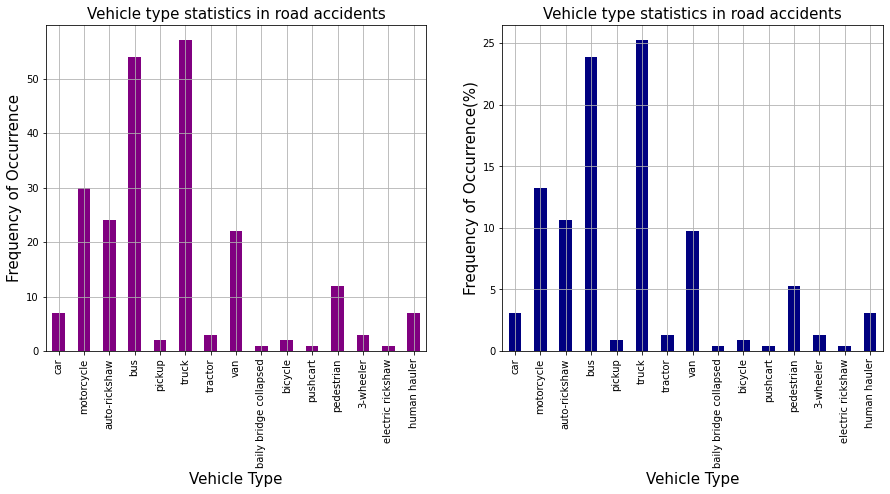

In [57]:

fig, ax = plt.subplots(1,2,figsize=(15,6))

vehicle_count_df['Count'].plot.bar(ax=ax[0], color='purple')
ax[0].set_xlabel('Vehicle Type', fontsize=15)
ax[0].set_ylabel('Frequency of Occurrence', fontsize=15)
ax[0].set_title('Vehicle type statistics in road accidents', fontsize = 15)
ax[0].grid()

vehicle_count_df['percentage count'].plot.bar(ax=ax[1], color='navy')
ax[1].set_xlabel('Vehicle Type', fontsize=15)
ax[1].set_ylabel('Frequency of Occurrence(%)', fontsize=15)
ax[1].set_title('Vehicle type statistics in road accidents', fontsize = 15)
ax[1].grid()
plt.show()

##more color names in https://matplotlib.org/stable/gallery/color/named_colors.html

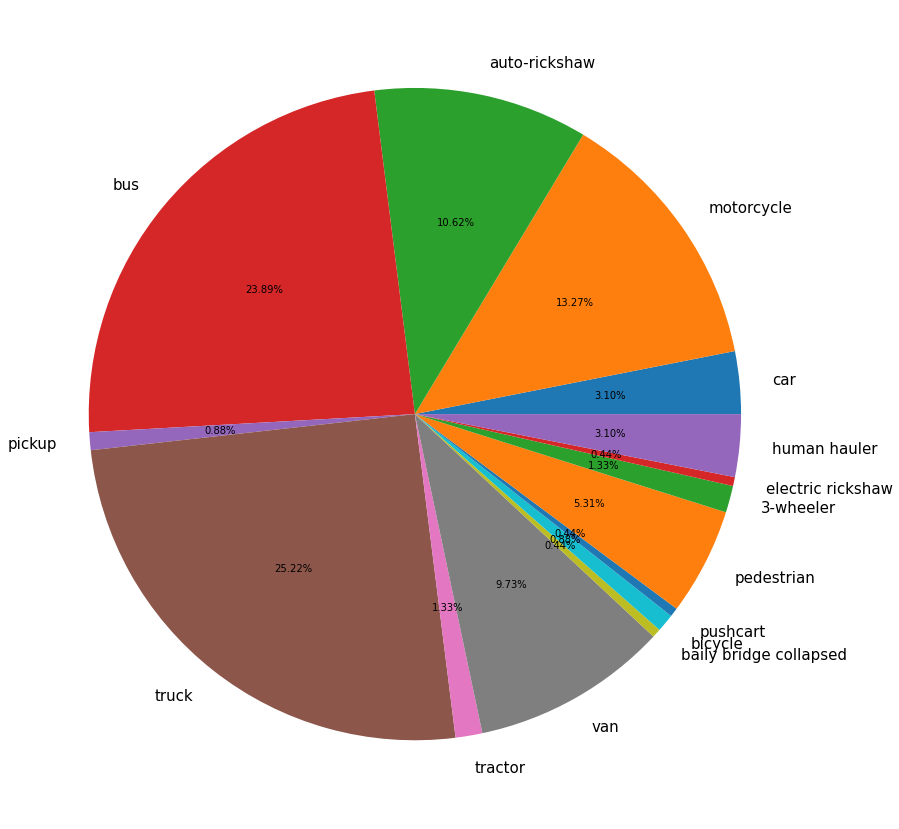

In [65]:
fig, ax = plt.subplots(figsize = (15,15))
patches, texts, autotexts = ax.pie(vehicle_count_df['percentage count'], labels = vehicle_count_df.index,autopct='%1.2f%%')
for i in range(len(texts)):
  texts[i].set_fontsize(15)
plt.show()

From the above visualizations, we observe a considerable percentage of vehicles involved in accidents are either truck(25.22%) or bus(23.89%) followed by motorcycle(13%), auto-rickshaw(about 11%), and van(about 10%). Other vehicles contribute far less to the reported accident statistics.

# **Published-time Analysis**

In [86]:
published_time_df = prothom_alo_df[['published-time']]
published_time_df['published-time'] = pd.to_datetime( published_time_df['published-time'] , dayfirst=False)
published_time_df['hour'] =  published_time_df['published-time'].dt.round('H').dt.hour #extracting the time of reporting and rounding it nearest hour
published_time_hourly_frequency = published_time_df['hour'].value_counts() #determine the frequency of reported accident for each hour
published_time_hourly_frequency = published_time_hourly_frequency.to_frame()
published_time_hourly_frequency.columns = ['Reported Cases']
total_cases = published_time_hourly_frequency.sum()
print(total_cases)
published_time_hourly_frequency['percentage cases'] = published_time_hourly_frequency['Reported Cases'].apply(lambda x: (x/total_cases)*100)
published_time_hourly_frequency.sort_index(inplace=True)
published_time_hourly_frequency

Reported Cases    123
dtype: int64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Reported Cases,percentage cases
0,10,8.130081
1,11,8.943089
2,10,8.130081
3,5,4.065041
4,2,1.626016
5,5,4.065041
6,4,3.252033
7,5,4.065041
8,7,5.691057
9,8,6.504065


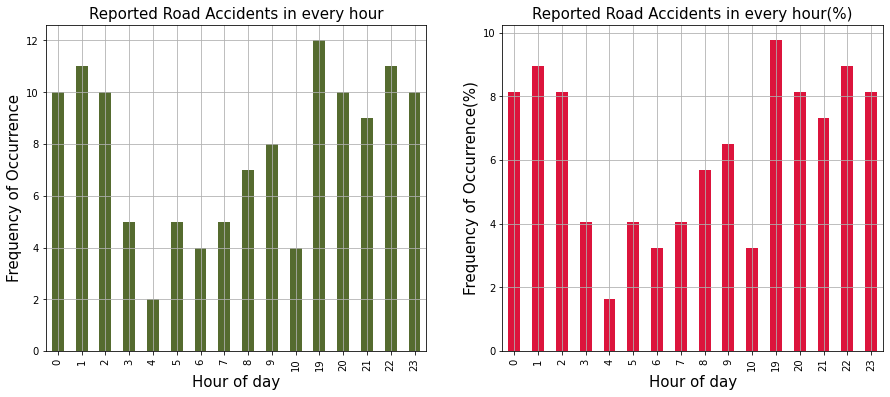

In [89]:
fig, ax = plt.subplots(1,2,figsize=(15,6))
#ax.bar(death_toll_stats.index, death_toll_stats.values())
published_time_hourly_frequency['Reported Cases'].plot.bar(ax=ax[0], color = 'darkolivegreen')
ax[0].set_xlabel('Hour of day', fontsize=15)
ax[0].set_ylabel('Frequency of Occurrence', fontsize=15)
ax[0].set_title('Reported Road Accidents in every hour', fontsize = 15)
ax[0].grid()

published_time_hourly_frequency['percentage cases'].plot.bar(ax=ax[1], color = 'crimson')
ax[1].set_xlabel('Hour of day', fontsize=15)
ax[1].set_ylabel('Frequency of Occurrence(%)', fontsize=15)
ax[1].set_title('Reported Road Accidents in every hour(%)', fontsize = 15)
ax[1].grid()
plt.show()

From the above visualizations, it seems Prothom Alo reports most accident cases from 19:00 to 2:00 (late night to midnight). Since new media report accident fairly quickly, we can say most reported accidents occur after sunset or at night. 